In [1]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

In this notebook we will use the Monte Carlo method to find the area under a curve, so first let's define a function
$$f(x) = x^2-4x+5$$

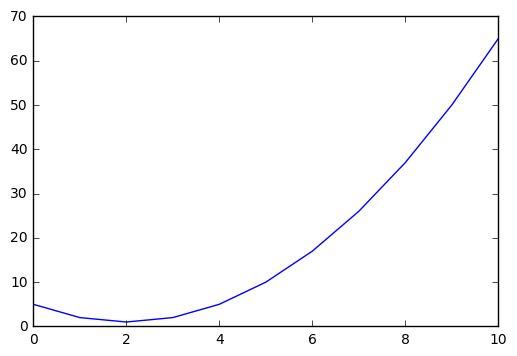

In [2]:
f = lambda x:x**2-4*x+5
x = range(0, 11, 1)
y = [f(v) for v in x]
plt.plot(y)

Now, we know the probability of a random point being below the curve is equal to 
 $$P_{curve}=\dfrac{A_{curve}}{A_{rectanle}}$$
Where $A_{rectangle}$ is the area of the plot in the given interval, so let's try to integrate it from 0 to 10

In [3]:
#Will use 3000 points
number_points=3000
#We want to see the points
points=[]
below=0
for p in range(0, number_points):
    x,y=(random.uniform(0,10), random.uniform(0, 70))
    # If the function for x is greater then the random y, then the point is under the curve
    if f(x) >= y:
        below +=1
    points.append((x,y))
ratio = below/number_points

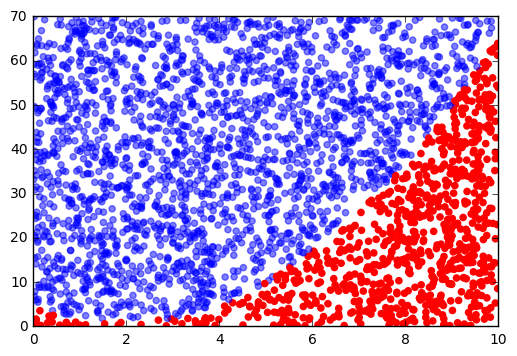

Ratio of points under the curve: 0.2747
Approximated area under the curve: 192.2667


In [4]:
color_func = lambda x,y: (1,0,0) if f(x)>=y else (0,0,1,0.5)
colors = [color_func(x,y) for (x,y) in points]
plt.ylim(0,70)
plt.xlim(0,10)
plt.scatter(*zip(*points), color=colors)
plt.show()
print("Ratio of points under the curve: %.4f" % ratio)
print("Approximated area under the curve: %.4f" % (ratio*700))

Knowing the ratio of points under the curve, we can now calculate the integral as 
$$P_{curve}A_{rectangle} = A_{cruve}$$
If we take the integral
$$\int_0^{10}x^2-4x+5$$
We have $$\dfrac{x^3}{3}-2x^2+5x\big\lvert_0^{10} = \dfrac{10^3}{3}-200+50 = 333.33 - 200 + 50 = 183.33$$
Which is close to the real area, now, let's see how many points we need

In [5]:
def monte_carlo_integration(f, number_points, xlims, ylims):
    below=0
    for p in range(0, number_points):
        x,y=(random.uniform(*xlims), random.uniform(*ylims))
        # If the function for x is greater then the random y, then the point is under the curve
        if y <= f(x):
            below +=1
    ratio = below/number_points
    area = ratio * (xlims[1]-xlims[0]) * (ylims[1]-ylims[0])
    return (ratio, area)

In [6]:
total_points = 10000
step = 100
estimated = [monte_carlo_integration(f, i, (0,10), (0,70))[1]
for i in range(step,total_points, step)]
mean = sum(estimated)/len(estimated)
print("Mean Approximated value %.4f" % mean)

Mean Approximated value 183.0119


Approximated Integral Value: 183.0119


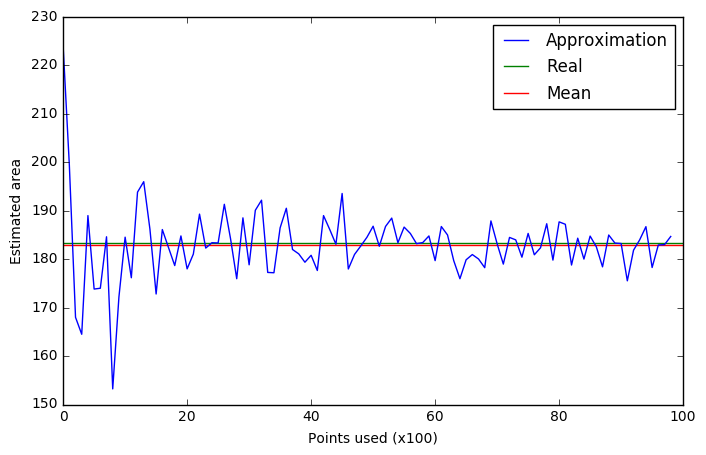

In [7]:
plt.figure(figsize=(8,5))
plt.plot(estimated)
plt.hlines(183.3, 0, total_points/step, 'g')
plt.hlines(mean, 0 , total_points/step, 'r')
plt.legend(['Approximation', 'Real', 'Mean'], loc='best')
plt.ylabel("Estimated area")
plt.xlabel("Points used (x100)")
print("Approximated Integral Value: %.4f" % mean)

As we can see the more points we sample, the more accurate our approximation is to the real values, now what about if we have segments of our curve under the $x$ axis? Let's look at this example
$$g(x) = x^2-4x-8$$

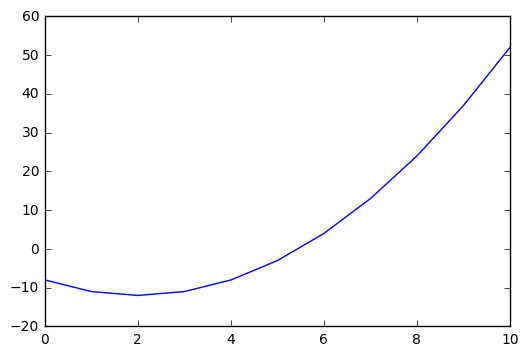

In [8]:
g = lambda x:x**2-4*x-8
x = range(0, 11, 1)
y = [g(v) for v in x]
plt.plot(y)

In [9]:
#Will use 3000 points
number_points=3000
#We want to see the points
points=[]
below=0
for p in range(0, number_points):
    x,y=(random.uniform(0,10), random.uniform(-20, 60))
    # If the function for x is greater then the random y, then the point is under the curve
    if f(x) > 0 and 0 < y < f(x):
        below +=1
    if f(x) < 0 and 0 > y >= f(x):
        below += 1
    points.append((x,y))
ratio = below/number_points

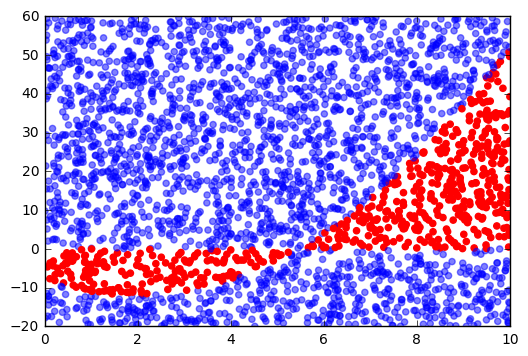

Ratio of points under the curve: 0.2300
Approximated area under the curve: 184.0000


In [10]:
color_func = lambda x,y: (1,0,0) if (g(x) > 0 and 0 <= y <= g(x)) or (g(x) <= 0 and 0 > y >= g(x)) else (0,0,1,0.5)
colors = [color_func(x,y) for (x,y) in points]
plt.ylim(-20,60)
plt.xlim(0,10)
plt.scatter(*zip(*points), color=colors)
plt.show()
print("Ratio of points under the curve: %.4f" % ratio)
print("Approximated area under the curve: %.4f" % (ratio*800))

We can see the area is around 184.0, so let's take the true integral to see if we are close to the real value

We have $$\int_0^{10}x^2-4x+5 = \dfrac{x^3}{3}-2x^2-8x\big\lvert_0^{10} = \dfrac{10^3}{3}-200-80 = 333.33 - 200 - 80 = 53.33$$

So, we are off by a lot, that's because we are adding the area under the $x$ axis instead of subtracting it. To do this, we are going to first, find the point where $g(x) = 0$ which is $x = 2+\sqrt{12} = 2 + 2\sqrt{3}$

In [11]:
#Let's adjust our function to deal with points under the x axis
def monte_carlo_integration(f, number_points, xlims, ylims):
    below=0
    for p in range(0, number_points):
        x,y=(random.uniform(*xlims), random.uniform(*ylims))
        # If the function for x is greater then the random y, then the point is under the curve
        if f(x) > 0 and 0 < y <= f(x):
            below += 1
        if f(x) < 0 and 0 > y >= f(x):
            below += 1
    ratio = below/number_points
    area = ratio * (xlims[1]-xlims[0]) * (ylims[1]-ylims[0])
    return (ratio, area)
#Calculating the area below and above the x axis (before and after the root)
_, area_before = monte_carlo_integration(g, 1000, (0,2+(12**(1/2))), (-20,60))
_, area_after = monte_carlo_integration(g, 1000, (2+(12**(1/2)),10), (-20,60))
area = area_after-area_before if area_after >= area_before else area_before-area_after
print("Estimated area under the curve: %.4f" % area)

Estimated area under the curve: 47.7057


In [12]:
def monte_carlo_integration_helper(f, number_points, xlims, ylims, root):
    _, area_before = monte_carlo_integration(f, number_points, (xlims[0],root), ylims)
    _, area_after = monte_carlo_integration(f, number_points, (root,xlims[1]), ylims)
    return area_after-area_before if area_after >= area_before else area_before-area_after
total_points = 10000
step = 100
estimated = [monte_carlo_integration_helper(g, i, (0,10), (-20,70), 2+(12**(1/2)))
for i in range(step,total_points, step)]
mean = sum(estimated)/len(estimated)
print("Mean Approximated value %.4f" % mean)

Mean Approximated value 52.9911


Approximated Integral Value: 52.9911


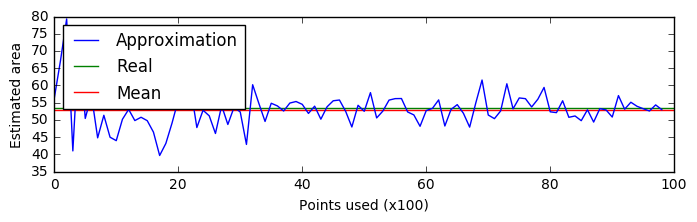

In [13]:
plt.figure(figsize=(8,2))
plt.plot(estimated)
plt.hlines(53.3, 0, total_points/step, 'g')
plt.hlines(mean, 0 , total_points/step, 'r')
plt.legend(['Approximation', 'Real', 'Mean'], loc='best')
plt.ylabel("Estimated area")
plt.xlabel("Points used (x100)")
print("Approximated Integral Value: %.4f" % mean)